**YOLO를 이용하여 왼쪽 눈의 좌표, 오른쪽 눈의 좌표, 입의 좌표, 담배 유무, 휴대폰 유무 정보를 받아오기**

In [ ]:
import sys
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/jnalgae/CustomizedYOLOv5
%cd CustomizedYOLOv5

Cloning into 'CustomizedYOLOv5'...
remote: Enumerating objects: 11380, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 11380 (delta 16), reused 0 (delta 0), pack-reused 11350 (from 1)
Receiving objects: 100% (11380/11380), 13.31 MiB | 15.42 MiB/s, done.
Resolving deltas: 100% (7561/7561), done.
/content/CustomizedYOLOv5


YOLOv5 모델이 추론한 결과를 받아온다.
- is_cigar: 담배 유/무
- is_phone: 휴대폰 유/무
- leye_coord: 왼쪽 눈의 좌상단 (x, y), 우하단 (x, y) 좌표
- reye_coord: 오른쪽 눈의 좌상단 (x, y), 우하단 (x, y) 좌표
- mouth_coord: 입의 좌상단 (x, y), 우하단 (x, y) 좌표

In [ ]:
import importlib
import detect
from detect import run
# importlib.reload(detect)

def img_detect(source_path, img_size=(480, 480), save_txt=True, save_conf=True, weights_path="/content/drive/MyDrive/CAB/train_result/best.pt",):
  return run(weights=weights_path, imgsz=img_size, source=source_path, save_txt=save_txt, save_conf=save_conf)

In [ ]:
is_cigar, is_phone, leye_coord, reye_coord, mouth_coord = img_detect("/content/drive/MyDrive/CAB/CAB_dataset/test_no_txt/045_G1_01_무광원_계기판_하품재현_20200929_110850_02512.jpg")

print(is_cigar, is_phone, leye_coord, reye_coord, mouth_coord)

YOLOv5 🚀 7e8bb89 Python-3.10.12 torch-2.5.0+cu121 CPU

/content/CustomizedYOLOv5/models/experimental.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(a

False False [319.0, 628.0, 406.0, 674.0] [445.0, 635.0, 530.0, 684.0] [364.0, 770.0, 462.0, 891.0]


YOLO의 추론 결과를 확인할 수 있는 함수이다.

위에서 추론한 담배의 유무(False), 휴대폰의 유무(False)처럼 해당 이미지에는 담배와 휴대폰이 없다.

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2] # image.shape = (높이, 너비, 채널 )
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC) # 이미지 3배 확대

  fig = plt.gcf() # matplotlib figure 객체 생성
  fig.set_size_inches(18, 10) # figure 크기 가로 18인치, 세로 10인치로 설정
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)) # figure에 표시
  plt.show()

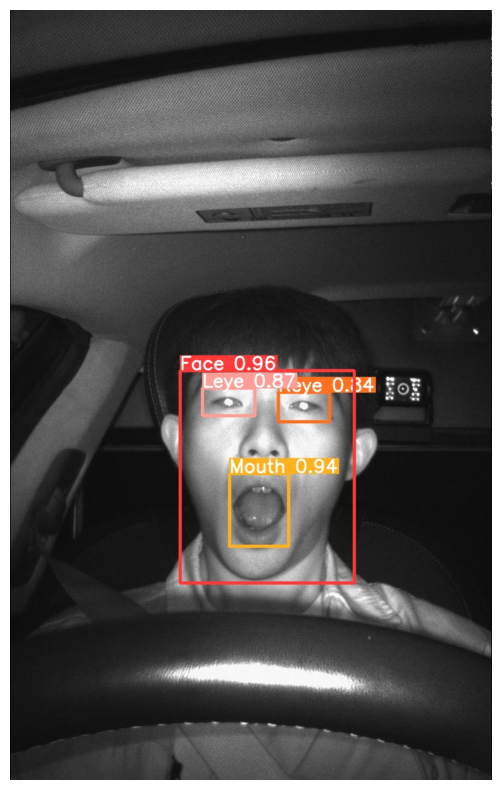

In [ ]:
imShow("/content/CustomizedYOLOv5/runs/detect/exp/045_G1_01_무광원_계기판_하품재현_20200929_110850_02512.jpg")